##**LinearRegression**   
가장 데이터를 잘 대표하는 가능성 높은 직선을 예측하는 과정

**(Linear) Hypothesis**  
H(x) = WX + B 에 대하여 가장 데이터에 잘 맞는 값을 찾기  

이때 사용 되는 개념 Loss  

**Cost Function (Loss)**  
어떤 hypothesis가 나은 지 확인해보기 위해 손실함수를 작성하고  
손실이 가장 작을때의 값을 최적의 상태라고 판단

보통 LinearRegression에서는  
**(H(x) - y)^2** 을 손실함수로 잡고  
이를 최소화 시키는 것에 중점을 둠

식 표기  
$$ cost = \frac{1}{m} \sum_{i=1}^m (H(x_i) - y_i)^2) $$

즉, cost(W,x)를 최소로하는 값 찾는 것이 **학습**  
minimize cost(W,b) 라고 함

Linear Regression 구현  
$$ H(x) = Wx + b $$

In [1]:
import tensorflow as tf

X_train = [1,2,3]
y_train = [1,2,3]
W = tf.Variable(tf.random.normal([1]),name = 'weight')
b = tf.Variable(tf.random.normal([1]),name = 'bias')

이때 Variable은 tensorflow의 변수로 최적의 값을 찾아 나아감에 따라 모델이 변화시키는 값임  
random.normal([1])로 차원을 1로 맞춰 주었음

In [2]:
optimizer = tf.optimizers.SGD(learning_rate=0.01)

for step in range(2001):
    with tf.GradientTape() as tape:
        hypothesis = W * X_train + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_train))
    grads = tape.gradient(cost, [W, b])

    optimizer.apply_gradients(zip(grads, [W, b]))

    if step % 100 == 0:
        print(f"Step: {step}, Cost: {cost.numpy():.4f}, W: {W.numpy()[0]:.4f}, b: {b.numpy()[0]:.4f}")

Step: 0, Cost: 0.4877, W: 0.4747, b: 0.5864
Step: 100, Cost: 0.0418, W: 0.7631, b: 0.5384
Step: 200, Cost: 0.0258, W: 0.8138, b: 0.4233
Step: 300, Cost: 0.0160, W: 0.8536, b: 0.3327
Step: 400, Cost: 0.0099, W: 0.8849, b: 0.2615
Step: 500, Cost: 0.0061, W: 0.9096, b: 0.2056
Step: 600, Cost: 0.0038, W: 0.9289, b: 0.1616
Step: 700, Cost: 0.0023, W: 0.9441, b: 0.1270
Step: 800, Cost: 0.0014, W: 0.9561, b: 0.0999
Step: 900, Cost: 0.0009, W: 0.9655, b: 0.0785
Step: 1000, Cost: 0.0005, W: 0.9729, b: 0.0617
Step: 1100, Cost: 0.0003, W: 0.9787, b: 0.0485
Step: 1200, Cost: 0.0002, W: 0.9832, b: 0.0381
Step: 1300, Cost: 0.0001, W: 0.9868, b: 0.0300
Step: 1400, Cost: 0.0001, W: 0.9896, b: 0.0236
Step: 1500, Cost: 0.0000, W: 0.9919, b: 0.0185
Step: 1600, Cost: 0.0000, W: 0.9936, b: 0.0146
Step: 1700, Cost: 0.0000, W: 0.9950, b: 0.0114
Step: 1800, Cost: 0.0000, W: 0.9960, b: 0.0090
Step: 1900, Cost: 0.0000, W: 0.9969, b: 0.0071
Step: 2000, Cost: 0.0000, W: 0.9976, b: 0.0056


**Hypothesis Cost 최소화하기**  
Simplifiled Hypothesis를 $$ H(x) = Wx $$  
라하면 cost function은 $$ cost(W) = \frac{1}{m}\sum_{i=1}^m(Wx_i - y_i)^2 $$

**Gradient Descent Algorithm**을 사용하기 위해서  
마치 한발자국씩 산을 타고 내려오듯이  
Cost(W)를 함수로 표현한 뒤(x축 -> W, y축 -> cost(W))  
해당 지점에서의 기울기를 토대로 Cost(W)가 최소가 될수있도록 조금씩 W 조정

계산의 편의를 위해 cost(W)에 1/2을 곱하면  
$$ cost(W) = \frac{1}{2m}\sum_{i=1}^m(Wx_i-y_i)^2 $$  
이를 W에 대하여 편미분하면  
$$ \frac{1}{2m}\sum_{i=1}^m2(Wx_i - y_i)x_i $$  
즉, 다음과 같음  
$$ \frac{1}{m}\sum_{i=1}^m(Wx_i - y_i)x_i $$ 

Cost function은 항상 Convex Function이어야함  
다시말해 어느점에서 Gradient Descent Algorithm을 사용해도  
한 곳으로 수렴해야함을 의미  
Convex Function이 아니면 초기 W값에 따라 결괏값이 여럿 나올 수 있고  
이는 최적을 항상 보장한다고 말 할 수 없음

다음은 손실함수를 그래프로 띄워보는 코드  
큰 틀은  
* 손실함수 정의
* x축(W), y축(cost(W)) 배열 만들기
* 범위를 지정하여 그 범위 내에서 나오는 값을 계산하여 배열에 넣기
* matplotlib으로 띄우기

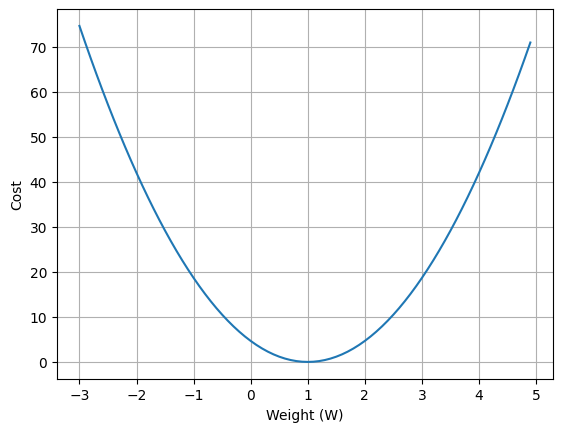

In [3]:
import matplotlib.pyplot as plt

X = tf.constant([1.,2.,3.])
Y = tf.constant([1.,2.,3.])

def cost_func(W,X,Y):
    hypothesis = X*W
    
    # reduce는 차원을 줄여준다는 의미
    return tf.reduce_mean(tf.square(hypothesis - Y)) 

W_history =[]
cost_history = []

for i in range(-30,50):
    curr_W = i * 0.1
    curr_cost = cost_func(curr_W, X, Y)

    W_history.append(curr_W)
    # cost_func이 반환한 값은 tf.Tensor(2.5, shape=(), dtype=float32) 꼴로 숫자가 아님
    # 따라서 숫자로 바꿔 주는 .numpy()작업이 꼭필요함
    cost_history.append(curr_cost.numpy())

plt.plot(W_history, cost_history)
plt.xlabel('Weight (W)')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

Cost Function으로 실제로 Gradient 갱신하기  
$$ Hypothsis = WX $$  
$$ Cost(W) = \frac{1}{m}\sum_{i=1}^m(Wx_i - y_i)^2$$
이때 기울기의 식이 다음과 같으므로  
$$ \frac{1}{m}\sum_{i=1}^m(Wx_i - y_i)x_i $$ 
기울기가 양일 때는 현 기울기가 줄어드는 방향으로  
기울기가 음일 때는 현 기울기가 늘어나는 방향으로  
조정이 필요함  
이를 구현 할 식은 다음과 같음  
$$ W := W - \alpha\frac{1}{m}\sum_{i=1}^m(Wx_i-y_i)x_i $$  
이는 기존의 기울기(Weight)에서  
사용자가 설정한 하이퍼파라미터인 learning rate와  
기울기(cost function을 W에 대해 미분한 값. 즉, Gradient)를 곱한 것을 뺀것

수동으로 경사하강법을 구현하여 가중치를 업데이트하는 방식을 코드로 구현  
핵심 로직  
* 기울기 구하기 : (W * X - Y) * X
* 이동할 값 계산 : W - learning_rate * gradient
* 업데이트 : W에 계산된 값을 덮어쓰기

In [4]:
tf.random.set_seed(777)

x_data = [1.,2.,3.]
y_data = [1.,2.,3.]

W = tf.Variable(tf.random.normal([1]), name = 'wieght') # W는 학습 가능한 변수

learning_rate = 0.1

for step in range(21):
    hypothesis = W * x_data
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    gradient = tf.reduce_mean((W * x_data - y_data) * x_data)
    descent = W - learning_rate * gradient

    W.assign(descent) # W라는 학습 가능한 변수의 자격을 유지한채 다른 값을 할당함

    print(f"Step: {step:<2}, Cost: {cost.numpy():.10f}, W: {W.numpy()[0]:.10f}")

Step: 0 , Cost: 0.2454772741, W: 0.8776789904
Step: 1 , Cost: 0.0698246434, W: 0.9347621202
Step: 2 , Cost: 0.0198612288, W: 0.9652064443
Step: 3 , Cost: 0.0056494228, W: 0.9814434052
Step: 4 , Cost: 0.0016069537, W: 0.9901031256
Step: 5 , Cost: 0.0004570936, W: 0.9947216511
Step: 6 , Cost: 0.0001300179, W: 0.9971848726
Step: 7 , Cost: 0.0000369824, W: 0.9984985590
Step: 8 , Cost: 0.0000105198, W: 0.9991992116
Step: 9 , Cost: 0.0000029925, W: 0.9995729327
Step: 10, Cost: 0.0000008512, W: 0.9997722507
Step: 11, Cost: 0.0000002421, W: 0.9998785257
Step: 12, Cost: 0.0000000688, W: 0.9999352098
Step: 13, Cost: 0.0000000196, W: 0.9999654293
Step: 14, Cost: 0.0000000056, W: 0.9999815822
Step: 15, Cost: 0.0000000016, W: 0.9999901652
Step: 16, Cost: 0.0000000005, W: 0.9999947548
Step: 17, Cost: 0.0000000001, W: 0.9999971986
Step: 18, Cost: 0.0000000000, W: 0.9999985099
Step: 19, Cost: 0.0000000000, W: 0.9999992251
Step: 20, Cost: 0.0000000000, W: 0.9999995828


**Optimizer의 사용**  
앞서 배운 assign을 사용하지 않고  
업데이트를 처리하는 optimizer  
  
**GradientTape를 사용한 기울기 수정**
* 손실함수의 계산값 기록 : Tape를 사용하여 기울기 계산하는 과정(어떤값과 어떤값이 곱해졌는지)기록
  (연산의 순서를 알아야 추후에 역전파 가능)
  *****************************************************
  with tf.GradientTape() as tape:   
    hypothesis = W * X + b  
    cost = tf.reduce_mean(tf.square(hypothesis - Y))  
  *****************************************************
  GradientTape는 위 블록 내의 계산상황을 기록함
  with블록 탈출시 계산 기록을 멈추고
  GradientTape 안에 기록된 내용은 추후 tape 변수로 사용 가능

  **다시 말해**  
  **GradientTape는 손실함수에 W값을 대입하여**
  $$ cost(W) = \frac{1}{m}\sum_{i=1}^m(Wx_i - y_i)^2 $$  
  **의 값을 구해준뒤 리스트에 저장** (이때 W는 tf의 variable형식)
* 편미분 적용  
  **tape.gradient는 편미분만을 수행하여**
  $$ \frac{1}{m}\sum_{i=1}^m(Wx_i - y_i)x_i$$
  **의 계산 값을 돌려줌**
* 값 업데이트 : apply_gradients()  
  optimizer.apply_gradients(zip(grads, [W]))에서
  각각의 W에 가중치를 업데이트  
  즉,
  $$ W := W - \alpha\frac{1}{m}\sum_{i=1}^m(Wx_i-y_i)x_i $$
  연산을 수행
  zip(grads, [W])는 (기울기, 변수) 짝을 지어주는 역할


In [5]:
import tensorflow as tf

X = [1.,2.,3.]
Y = [1.,2.,3.]

W = tf.Variable(5.0)

optimizer = tf.optimizers.SGD(learning_rate = 0.1)

for step in range(101):
    with tf.GradientTape() as tape:
        hypothesis = W*X
        cost = tf.reduce_mean(tf.square(hypothesis - Y))

    grads = tape.gradient(cost,[W])

    optimizer.apply_gradients(zip(grads, [W]))

    if step%10 == 0: print(step, W.numpy())

0 1.2666664
10 1.0
20 1.0
30 1.0
40 1.0
50 1.0
60 1.0
70 1.0
80 1.0
90 1.0
100 1.0
